# Recycling Effectiveness in MA

### *Part 2: Clustering of Municipalities Based on Census Data*


In [ ]:
# add in DBScan as a clustering mechanism
# you MUST normalize your features for PCA, so redo that:
## https://stats.stackexchange.com/questions/69157/why-do-we-need-to-normalize-data-before-principal-component-analysis-pca#:~:text=2%20Answers&text=Normalization%20is%20important%20in%20PCA,have%20not%20normalized%20the%20data.
# check heatmap again for correlation with scaled data, see if there are different trends indicating which to remove
# when re-running PCA, remove pre-selected correlated datapoints, even if heatmap shows nothing. Just explain your decision
# After running PCA, retry the 3 clustering algorithms with the trimmed features for PCA, and further trimming based on feature importance (must be >5% in at least one Z), and see how they change.
# With the new and old cluster labels, try 3 dimensional plotting of Z1, Z2, and Z3 with color overlay of labels for each clustering model

In [54]:
# imports

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [55]:
characteristics = pd.read_csv('data/combined_municipality_characteristics.csv', index_col='municipality')

In [56]:
characteristics.head(2)

,KEY_population_25_and_older,edu_high_school_and_higher_%,edu_bachelors_and_higher_%,KEY_pop_16_+,unemployment_rate_%,median_household_income,mean_household_income,families_below_poverty_level_%,people_below_poverty_level_%,KEY_total_housing_units,...,demo_black_aa_%,demo_american_indian_%,demo_asian_%,demo_native_islander%,demo_other_Race_%,demo_hispanic_latino_%,dem%,rep%,un%,total_waste/hh
municipality,,,,,,,,,,,,,,,,,,,,,
Sharon,3833,98.4,72.9,4443,4.5,144333,173768,0.0,2.0,2195,...,1.4,0.5,10.3,0.0,1.5,2.8,32,7,60,1.161119
Southbridge,11439,82.6,17.2,13614,8.8,51270,64448,16.7,20.7,7368,...,5.3,1.6,0.5,0.1,10.9,32.9,31,10,57,0.934264


In [57]:
characteristics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271 entries, Sharon to Yarmouth
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   KEY_population_25_and_older     271 non-null    int64  
 1   edu_high_school_and_higher_%    271 non-null    float64
 2   edu_bachelors_and_higher_%      271 non-null    float64
 3   KEY_pop_16_+                    271 non-null    int64  
 4   unemployment_rate_%             271 non-null    float64
 5   median_household_income         271 non-null    int64  
 6   mean_household_income           271 non-null    int64  
 7   families_below_poverty_level_%  271 non-null    float64
 8   people_below_poverty_level_%    271 non-null    float64
 9   KEY_total_housing_units         271 non-null    int64  
 10  occupancy_%                     271 non-null    float64
 11  1-unit_detached_%               271 non-null    float64
 12  1-unit_attached_%              

In [58]:
characteristics[~(characteristics >= 0).all(1)].T

municipality,Deerfield,Westminster,Lanesborough,Wareham,Leicester
KEY_population_25_and_older,3.110000e+02,5620.0,1834.0,7601.0,4519.0
edu_high_school_and_higher_%,9.840000e+01,95.7,94.3,92.6,91.3
edu_bachelors_and_higher_%,7.460000e+01,40.4,39.9,28.7,29.4
KEY_pop_16_+,5.390000e+02,6237.0,2004.0,8456.0,5671.0
unemployment_rate_%,8.100000e+00,4.6,8.1,4.5,3.7
median_household_income,-6.666667e+08,100972.0,67625.0,63805.0,81042.0
mean_household_income,9.096300e+04,118373.0,80318.0,78138.0,95204.0
families_below_poverty_level_%,0.000000e+00,1.0,2.6,8.2,5.8
people_below_poverty_level_%,3.890000e+01,2.6,8.1,11.7,8.1
KEY_total_housing_units,1.550000e+02,3080.0,1558.0,5467.0,2542.0


I'm not sure how the clustering will work with the NaN values in the four municipalities with no total_waste/hh information. Unfortunately, these locations did not have any trash data recorded, so I couldn't get an accurate picture of how much waste they generate. I think I'll try imputing these values or simply remove them before running the algorithms. They aren't towns with a lot of data anyways.

The one thing I definitely need to fix right away is the median household income for Deerfield. I think in the census data, if they are missing information, they input a very large negative number. So it's artificially messing up my stats. I'm going to apply the mean household income for Deerfield to it's median income, as this is the best approximation that I have. It is a small town so hopefully the median wouldn't be too far from the mean.

In [59]:
characteristics.at['Deerfield', 'median_household_income',] = characteristics.loc['Deerfield']['mean_household_income']
characteristics.loc['Deerfield']['median_household_income']

90963.0

In [60]:
from sklearn.impute import KNNImputer

In [61]:
to_impute = characteristics[~(characteristics >= 0).all(1)].index

In [62]:
knni = KNNImputer()
characteristics_im = characteristics.copy()
characteristics_im.loc[:,:] = knni.fit_transform(characteristics)

In [63]:
characteristics_im.loc[to_impute]

,KEY_population_25_and_older,edu_high_school_and_higher_%,edu_bachelors_and_higher_%,KEY_pop_16_+,unemployment_rate_%,median_household_income,mean_household_income,families_below_poverty_level_%,people_below_poverty_level_%,KEY_total_housing_units,...,demo_black_aa_%,demo_american_indian_%,demo_asian_%,demo_native_islander%,demo_other_Race_%,demo_hispanic_latino_%,dem%,rep%,un%,total_waste/hh
municipality,,,,,,,,,,,,,,,,,,,,,
Westminster,5620.0,95.7,40.4,6237.0,4.6,100972.0,118373.0,1.0,2.6,3080.0,...,0.0,0.0,0.5,0.0,0.0,3.3,17.0,15.0,65.0,0.918887
Lanesborough,1834.0,94.3,39.9,2004.0,8.1,67625.0,80318.0,2.6,8.1,1558.0,...,2.3,0.3,0.2,0.0,0.7,0.8,26.0,10.0,62.0,0.702077
Wareham,7601.0,92.6,28.7,8456.0,4.5,63805.0,78138.0,8.2,11.7,5467.0,...,8.4,3.1,1.3,0.8,5.2,4.1,23.0,12.0,63.0,0.861921
Leicester,4519.0,91.3,29.4,5671.0,3.7,81042.0,95204.0,5.8,8.1,2542.0,...,3.4,0.1,1.2,0.1,0.0,2.4,24.0,11.0,64.0,1.112992


I can't know for sure how well this fit but from my analysis in Part 1, these values for total_waste/hh all seem reasonable. I will check out these point when comparing them in their own clusters.

-----

## Clustering

### kMeans Clustering

In [64]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(characteristics_im)

KMeans(n_clusters=6)

In [65]:
kmeans.cluster_centers_

array([[ 1.17850204e+04,  9.63918367e+01,  6.05938776e+01,
         1.35936327e+04,  3.52653061e+00,  1.24362184e+05,
         1.55005327e+05,  2.54285714e+00,  4.20204082e+00,
         6.71353061e+03,  9.31285714e+01,  7.22489796e+01,
         5.64081633e+00,  4.89387755e+00,  3.81428571e+00,
         3.56734694e+00,  3.05714286e+00,  6.47551020e+00,
         2.93877551e-01,  1.02040816e-02,  8.04020408e+01,
         1.95979592e+01,  1.69690204e+04,  9.50040816e+01,
         4.25918367e+01,  8.95448980e+01,  3.07142857e+00,
         6.06122449e-01,  7.87346939e+00,  7.95918367e-02,
         1.10612245e+00,  3.74081633e+00,  2.59795918e+01,
         1.30204082e+01,  5.99183673e+01,  1.03245861e+00],
       [ 4.73775000e+05,  8.72000000e+01,  4.97000000e+01,
         5.86859000e+05,  6.60000000e+00,  7.11150000e+04,
         1.07608000e+05,  1.41000000e+01,  1.89000000e+01,
         2.94418000e+05,  9.15000000e+01,  1.19000000e+01,
         6.30000000e+00,  1.34000000e+01,  2.42000000e+

In [66]:
pd.Series(kmeans.labels_).value_counts()

2    95
5    80
0    49
3    26
4    20
1     1
dtype: int64

In [67]:
characteristics_im['label'] = kmeans.labels_

In [68]:
population_stats = characteristics_im.describe().T

In [69]:
population_stats

,count,mean,std,min,25%,50%,75%,max
KEY_population_25_and_older,271.0,14368.933579,32729.100700,67.00000,1973.000000,6036.000000,17193.000000,473775.000000
edu_high_school_and_higher_%,271.0,94.488192,12.452289,67.00000,92.000000,95.000000,97.300000,282.900000
edu_bachelors_and_higher_%,271.0,45.076753,18.132243,9.60000,31.800000,42.800000,55.850000,116.500000
KEY_pop_16_+,271.0,17028.841328,40391.221397,71.00000,2182.500000,7154.000000,19912.500000,586859.000000
unemployment_rate_%,271.0,4.254244,2.126981,0.00000,3.000000,4.000000,5.100000,19.500000
median_household_income,271.0,92213.033210,34934.766253,21000.00000,67562.500000,85200.000000,106794.000000,216250.000000
mean_household_income,271.0,116922.225092,46824.687602,37634.00000,85539.500000,106832.000000,136861.500000,355097.000000
families_below_poverty_level_%,271.0,4.722878,4.257194,0.00000,2.000000,3.500000,6.400000,25.400000
people_below_poverty_level_%,271.0,7.547970,5.291165,0.00000,3.900000,6.300000,9.600000,38.900000
KEY_total_housing_units,271.0,8680.955720,20267.871472,70.00000,1441.500000,3869.000000,9671.500000,294418.000000


In [70]:
stats0 = characteristics_im[characteristics_im['label'] == 0].describe().T
stats2 = characteristics_im[characteristics_im['label'] == 2].describe().T
stats3 = characteristics_im[characteristics_im['label'] == 3].describe().T
stats4 = characteristics_im[characteristics_im['label'] == 4].describe().T
stats5 = characteristics_im[characteristics_im['label'] == 5].describe().T

In [71]:
sub0 = 100*(population_stats - stats0) / population_stats

sub0.drop(columns=['count', 'std', 'min', 'max'], inplace=True)
sub0[(abs(sub0['mean']) > 10) | (abs(sub0['25%']) > 10) | (abs(sub0['50%']) > 10) | (abs(sub0['75%']) > 10)]

,mean,25%,50%,75%
KEY_population_25_and_older,17.982637,-150.380132,-57.836315,2.797650
edu_bachelors_and_higher_%,-34.423786,-72.327044,-39.018692,-21.038496
KEY_pop_16_+,20.172886,-165.017182,-52.683813,3.844319
unemployment_rate_%,17.105578,6.666667,15.000000,15.686275
median_household_income,-34.863998,-69.181129,-45.692488,-24.286945
mean_household_income,-32.571311,-67.862800,-40.398008,-21.753013
families_below_poverty_level_%,46.158740,25.000000,42.857143,48.437500
people_below_poverty_level_%,44.328865,25.641026,39.682540,51.041667
KEY_total_housing_units,22.663692,-79.327090,-38.950633,3.675748
1-unit_detached_%,-3.767495,-13.669065,-2.510460,1.875733


So cluster `0` is high population, higher percentage of poverty, more multi-unit homes, more renter occupation, a much more ethnically diverse population all around, and significantly less Republican.

In [72]:
sub2 = 100*(population_stats - stats2) / population_stats

sub2.drop(columns=['count', 'std', 'min', 'max'], inplace=True)
sub2[(abs(sub2['mean']) > 10) | (abs(sub2['25%']) > 10) | (abs(sub2['50%']) > 10) | (abs(sub2['75%']) > 10)]

,mean,25%,50%,75%
KEY_population_25_and_older,39.376888,-2.154080,2.302850,26.772524
KEY_pop_16_+,41.267012,-7.262314,7.995527,28.868801
median_household_income,2.281823,-22.171323,-5.633803,7.646965
mean_household_income,4.050478,-18.815284,-4.095215,11.988397
families_below_poverty_level_%,29.458716,-5.000000,11.428571,24.218750
people_below_poverty_level_%,17.482175,0.000000,15.873016,17.708333
KEY_total_housing_units,42.120974,4.578564,20.031016,25.047821
2-units_%,15.003101,-2.040816,12.280702,19.417476
3-4_units_%,26.643278,12.121212,11.627907,27.083333
5-9_units_%,19.861081,16.666667,13.333333,13.675214


Cluster `2` is higher population (but not as high as `0`), much lower education, very high unemployment and high rate of poverty (even higher than cluster `0`), higher multi-unit homes but not ones that exceed 10 units, higher renter occupation, high ethnic diversity with the exception of Asians, and again low Republicans.

In [73]:
sub3 = 100*(population_stats - stats3) / population_stats

sub3.drop(columns=['count', 'std', 'min', 'max'], inplace=True)
sub3[(abs(sub3['mean']) > 10) | (abs(sub3['25%']) > 10) | (abs(sub3['50%']) > 10) | (abs(sub3['75%']) > 10)]

,mean,25%,50%,75%
KEY_population_25_and_older,-271.056925,-1881.360872,-619.880716,-265.453964
edu_high_school_and_higher_%,8.792022,10.407609,7.105263,6.680370
edu_bachelors_and_higher_%,25.383677,35.062893,29.906542,24.709042
KEY_pop_16_+,-275.402252,-1966.918671,-637.244898,-272.799749
unemployment_rate_%,-30.005938,-50.000000,-37.500000,-17.156863
median_household_income,26.411036,20.127290,20.901995,27.390584
mean_household_income,25.599918,17.906640,19.878875,27.411288
families_below_poverty_level_%,-120.774760,-236.250000,-197.142857,-100.390625
people_below_poverty_level_%,-82.321042,-136.538462,-107.142857,-70.052083
KEY_total_housing_units,-273.947660,-1562.747138,-572.473507,-313.563046


Cluster `3` is extremely higher population, high education, low unemployment and poverty, high income, a weird mix of 1-unit "attached" (not sure what that means) and 10+ unit homes, with less of the smaller aparment buildings, less renter occupation (which means more owner occupation), highly diverse ethnically with the exception of american indians and native islanders, significantly more republican and significantly more waste generating.

In [74]:
sub4 = 100*(population_stats - stats4) / population_stats

sub4.drop(columns=['count', 'std', 'min', 'max'], inplace=True)
sub4[(abs(sub4['mean']) > 10) | (abs(sub4['25%']) > 10) | (abs(sub4['50%']) > 10) | (abs(sub4['75%']) > 10)]

,mean,25%,50%,75%
KEY_population_25_and_older,21.679992,-75.316776,-10.395958,10.847438
edu_high_school_and_higher_%,-13.813163,-6.385870,-3.736842,-1.644399
edu_bachelors_and_higher_%,-77.086847,-141.116352,-86.214953,-47.448523
KEY_pop_16_+,21.928041,-79.862543,-9.421303,11.661017
unemployment_rate_%,3.508110,8.333333,7.500000,14.215686
median_household_income,-91.849507,-135.730250,-110.639671,-83.717952
mean_household_income,-104.570046,-150.819797,-115.159316,-84.249405
families_below_poverty_level_%,38.279162,37.500000,48.571429,50.390625
people_below_poverty_level_%,44.422146,37.179487,47.619048,53.645833
KEY_total_housing_units,25.361329,-25.251474,3.476350,13.919764


Cluster 4 is lower populations, higher educations, lower poverty+unemployment with higher income, much more single family homes with less multi-unit options, more owner occupation, higher median age (interesting, this hasn't shown up in other clusters), almost no ethnic diversity, incredibly republican or undeclared, with much less waste generation.

In [75]:
sub5 = 100*(population_stats - stats5) / population_stats

sub5.drop(columns=['count', 'std', 'min', 'max'], inplace=True)
sub5[(abs(sub5['mean']) > 10) | (abs(sub5['25%']) > 10) | (abs(sub5['50%']) > 10) | (abs(sub5['75%']) > 10)]

,mean,25%,50%,75%
KEY_population_25_and_older,64.864303,65.648758,68.870113,63.237946
edu_bachelors_and_higher_%,24.975186,27.987421,22.429907,20.769919
KEY_pop_16_+,64.491565,65.864834,70.771596,63.069680
unemployment_rate_%,-12.270253,-10.833333,-11.250000,-17.647059
median_household_income,32.737328,19.251804,24.876761,35.262983
mean_household_income,32.862946,17.619638,24.206698,36.624617
families_below_poverty_level_%,-31.090613,-56.250000,-55.714286,-25.390625
people_below_poverty_level_%,-30.382730,-81.410256,-40.476190,-22.135417
KEY_total_housing_units,59.936727,62.018730,60.118894,49.149563
occupancy_%,10.152141,17.009720,8.315565,3.519291


Cluster 5 is less educated with more poverty, lots of un-occupied homes with multi-unit homes (mobile parks ahve seemed to be lumped into here), median age is lower, much higher black, american indian, and latino populations much few asians and native islanders, low republican representation, low waste.

Cluster 1, with only one municipality, should be Boston.

In [76]:
characteristics_im[characteristics_im['label'] == 1]

,KEY_population_25_and_older,edu_high_school_and_higher_%,edu_bachelors_and_higher_%,KEY_pop_16_+,unemployment_rate_%,median_household_income,mean_household_income,families_below_poverty_level_%,people_below_poverty_level_%,KEY_total_housing_units,...,demo_american_indian_%,demo_asian_%,demo_native_islander%,demo_other_Race_%,demo_hispanic_latino_%,dem%,rep%,un%,total_waste/hh,label
municipality,,,,,,,,,,,,,,,,,,,,,
Boston,473775.0,87.2,49.7,586859.0,6.6,71115.0,107608.0,14.1,18.9,294418.0,...,0.9,10.7,0.2,7.4,19.8,51.0,6.0,42.0,0.866012,1


## PCA

In [77]:
from sklearn.decomposition import PCA

In [78]:
list(characteristics_im.columns)

['KEY_population_25_and_older',
 'edu_high_school_and_higher_%',
 'edu_bachelors_and_higher_%',
 'KEY_pop_16_+',
 'unemployment_rate_%',
 'median_household_income',
 'mean_household_income',
 'families_below_poverty_level_%',
 'people_below_poverty_level_%',
 'KEY_total_housing_units',
 'occupancy_%',
 '1-unit_detached_%',
 '1-unit_attached_%',
 '2-units_%',
 '3-4_units_%',
 '5-9_units_%',
 '10-19_units_%',
 '20+_units_%',
 'mobile_home_%',
 'boat_RV_van_%',
 'owner-occupied_%',
 'renter-occupied_%',
 'KEY_total_population',
 'males-to-100females',
 'median_age',
 'demo_white_%',
 'demo_black_aa_%',
 'demo_american_indian_%',
 'demo_asian_%',
 'demo_native_islander%',
 'demo_other_Race_%',
 'demo_hispanic_latino_%',
 'dem%',
 'rep%',
 'un%',
 'total_waste/hh',
 'label']

In [79]:
# getting rid of some obviously highly correlated data (like population above certain age groups, mean income) in additional to some categories with only very few data points (mobile homes and RVs)

cols_to_include = ['edu_high_school_and_higher_%',
 'edu_bachelors_and_higher_%',
 'unemployment_rate_%',
 'median_household_income',
 'people_below_poverty_level_%',
 'occupancy_%',
 '1-unit_detached_%',
 '1-unit_attached_%',
 '2-units_%',
 '3-4_units_%',
 '5-9_units_%',
 '10-19_units_%',
 '20+_units_%',
 'owner-occupied_%',
# 'renter-occupied_%',
 'KEY_total_population',
 'median_age',
# 'demo_white_%',
 'demo_black_aa_%',
 'demo_american_indian_%',
 'demo_asian_%',
 'demo_native_islander%',
 'demo_other_Race_%',
 'demo_hispanic_latino_%',
# 'dem%',
 'rep%',
 'un%',
 'total_waste/hh']

In [80]:
chars_df = characteristics_im[cols_to_include]

In [81]:
pca = PCA(n_components=6)
characteristics_pca = pca.fit_transform(chars_df)

In [82]:
pca.explained_variance_ratio_

array([6.54948424e-01, 3.45051037e-01, 2.48786863e-07, 1.02698899e-07,
       6.89841573e-08, 2.74354989e-08])

In [83]:
components = pd.DataFrame(pca.components_, columns=chars_df.columns, index=['z1', 'z2','z3','z4','z5','z6']).T
components.sort_values(by='z1', ascending=False)

,z1,z2,z3,z4,z5,z6
KEY_total_population,9.917932e-01,1.278521e-01,0.000304,-0.000095,-0.000049,-0.000081
renter-occupied_%,1.498632e-04,-1.474321e-04,-0.240924,0.443183,0.211215,-0.011754
dem%,7.779377e-05,-1.212248e-05,-0.091652,0.009061,0.344155,0.426620
demo_hispanic_latino_%,7.051476e-05,-4.498546e-05,-0.088369,0.094967,0.001939,0.415088
20+_units_%,6.392165e-05,1.658632e-05,-0.088832,0.128113,0.074828,0.027559
demo_black_aa_%,5.926637e-05,-1.392430e-05,-0.031101,0.023029,0.023253,0.298040
3-4_units_%,5.496377e-05,-6.159254e-05,-0.099062,0.132517,0.038168,-0.063098
people_below_poverty_level_%,3.976528e-05,-7.176061e-05,-0.021496,0.086058,0.061289,0.153603
2-units_%,3.773078e-05,-5.498425e-05,-0.093285,0.132739,0.053445,-0.024356
occupancy_%,3.499054e-05,1.784562e-04,-0.047151,0.610601,-0.529192,0.267205


In [84]:
(abs(components) > 0.05).any(1)

edu_high_school_and_higher_%     True
edu_bachelors_and_higher_%       True
unemployment_rate_%             False
median_household_income          True
people_below_poverty_level_%     True
occupancy_%                      True
1-unit_detached_%                True
1-unit_attached_%                True
2-units_%                        True
3-4_units_%                      True
5-9_units_%                      True
10-19_units_%                    True
20+_units_%                      True
owner-occupied_%                 True
renter-occupied_%                True
KEY_total_population             True
median_age                       True
demo_white_%                     True
demo_black_aa_%                  True
demo_american_indian_%          False
demo_asian_%                     True
demo_native_islander%           False
demo_other_Race_%                True
demo_hispanic_latino_%           True
dem%                             True
rep%                             True
un%         

In [85]:
# based on PCA, getting rid features that contribute less than 5% to any dimension

# cols_to_include = ['edu_high_school_and_higher_%',
#  'edu_bachelors_and_higher_%',
#  'median_household_income',
#  'people_below_poverty_level_%',
#  'occupancy_%',
#  '1-unit_detached_%',
#  '1-unit_attached_%',
#  '2-units_%',
#  '3-4_units_%',
#  '5-9_units_%',
#  '10-19_units_%',
#  '20+_units_%',
#  'owner-occupied_%',
#  'renter-occupied_%',
#  'KEY_total_population',
#  'median_age',
#  'demo_white_%',
#  'demo_black_aa_%',
#  'demo_asian_%',
#  'demo_other_Race_%',
#  'demo_hispanic_latino_%',
#  'dem%',
#  'rep%',
#  'un%']

In [86]:
import seaborn as sns

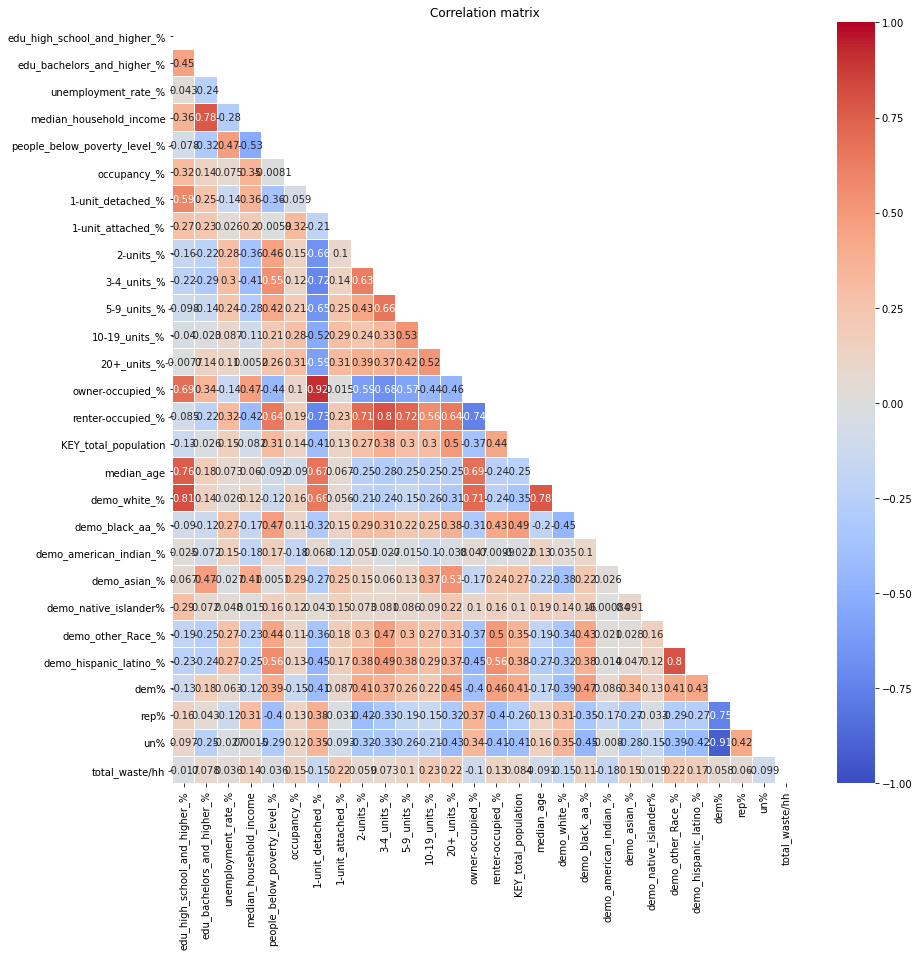

In [87]:
mask = np.zeros_like(chars_df.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(14, 14))
sns.heatmap(
    chars_df.corr(),
    cmap='coolwarm',
    annot=True,
    mask=mask,
    vmin=-1.,
    vmax=1.,
    linewidths=.01
)

plt.title('Correlation matrix');

In [88]:
kmeans2 = KMeans(n_clusters=6)
kmeans2.fit(chars_df)

KMeans(n_clusters=6)

In [89]:
pd.Series(kmeans2.labels_).value_counts()

0    122
1     78
5     40
4     20
3     10
2      1
dtype: int64

In [90]:
chars_df['km_label'] = kmeans2.labels_

<ipython-input-90-d69da9e2be8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chars_df['km_label'] = kmeans2.labels_


second lowest cluster by count, `1`, appears to be highly educated, high income, lots of detached 1-unit homes, highest occupancy, highest owner-occupied, highest asian population. There seems to be good separation in the cluster's center from the others. 

What other clustering evaluation can I do on kMeans?

## Hierarchial

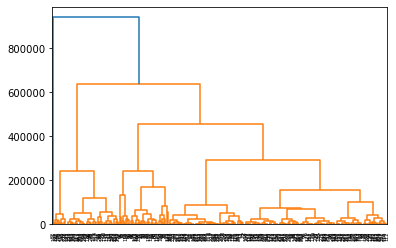

In [91]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(chars_df.drop(columns='km_label'), method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(chars_df.drop(columns='km_label'))

Wow, so cool... um... looks like a natural cut off in the 300,000 distance range, which would result in 5 groups. Could also plit just above 200,000 to get 6 clusters, but this would spit and already smaller cluster.

In [92]:
chars_df['h_label'] = hc.labels_
chars_df['h_label'].value_counts()

<ipython-input-92-e49d48dc6709>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chars_df['h_label'] = hc.labels_


2    116
4     61
0     53
1     40
3      1
Name: h_label, dtype: int64

In [93]:
chars_df.groupby(['h_label']).median().T

h_label,0,1,2,3,4
edu_high_school_and_higher_%,97.500000,90.200000,94.950000,87.200000,93.400000
edu_bachelors_and_higher_%,68.700000,33.450000,41.250000,49.700000,33.200000
unemployment_rate_%,3.600000,5.150000,3.700000,6.600000,4.700000
median_household_income,135909.000000,68876.000000,90330.500000,71115.000000,62500.000000
people_below_poverty_level_%,3.100000,12.400000,5.250000,18.900000,9.000000
occupancy_%,95.700000,94.050000,94.200000,91.500000,85.300000
1-unit_detached_%,81.100000,44.300000,74.750000,11.900000,71.700000
1-unit_attached_%,4.100000,5.500000,4.200000,6.300000,2.400000
2-units_%,2.500000,12.800000,5.100000,13.400000,7.700000
3-4_units_%,2.400000,11.600000,3.700000,24.200000,6.300000


C:\Users\nanai\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\nanai\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


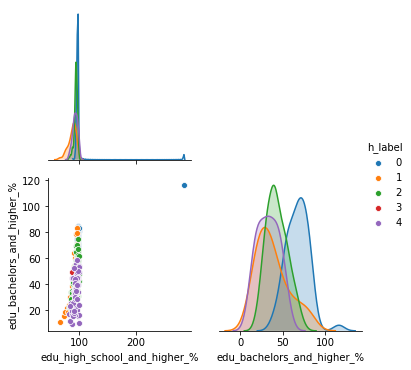

In [94]:
sns.pairplot(data =chars_df.loc[:,['edu_high_school_and_higher_%','edu_bachelors_and_higher_%','h_label']], hue = 'h_label', corner = True)

Next steps:

* do some grid searching?
* any further cleaning or prepping of data?
* add in amount of waste generated as an characteristic? (this would mean trimming down to just the municipalities I'm looking at. 
* find political data?

In [96]:
# For saving files
# chars_df.to_csv('data/cluster_data.csv', index=True)